# Exercise 3

In [11]:
import numpy as np
from scipy.special import eval_legendre
import matplotlib.pyplot as plt
from scipy.optimize import linprog

figs=(14,7)

In [12]:
N = 50
x = np.linspace(-1,1,N)
L1 = eval_legendre(1,x)
L2 = eval_legendre(2,x)
L3 = eval_legendre(3,x)
L4 = eval_legendre(4,x)

In [13]:
b0 = -0.001
b1 = 0.01
b2 = 0.55
b3 = 1.5
b4 = 1.2
b = np.array([b0, b1, b2, b3, b4])
y = b[0] + b[1]*L1 + b[2]*L2 + b[3]*L3 + b[4]*L4 + 0.2*np.random.randn(N)

Text(0, 0.5, 'Y axis')

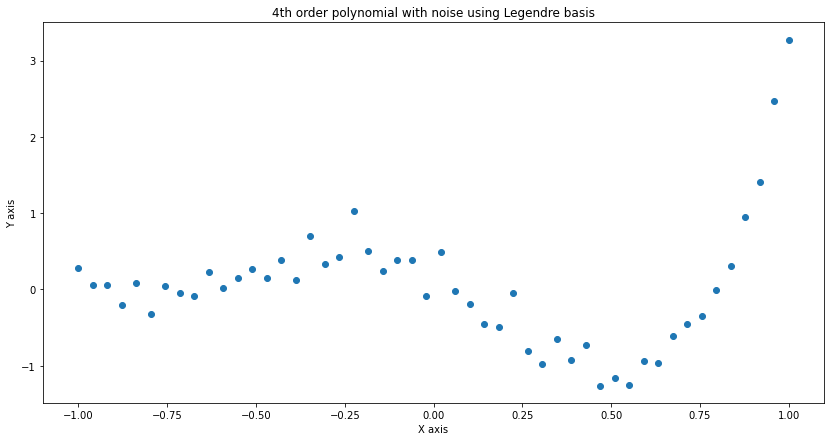

In [14]:
fig, ax1 = plt.subplots(figsize=figs)
plt.plot(x, y, 'o')
plt.title("4th order polynomial with noise using Legendre basis")
plt.xlabel("X axis")
plt.ylabel("Y axis")

In [15]:
X = np.column_stack((eval_legendre(0,x), eval_legendre(1,x), eval_legendre(2,x), eval_legendre(3,x), eval_legendre(4,x)))
b_hat= np.linalg.lstsq(X, y, rcond=None)[0]
y_hat = b_hat[0] + b_hat[1]*L1 + b_hat[2]*L2 + b_hat[3]*L3 + b_hat[4]*L4

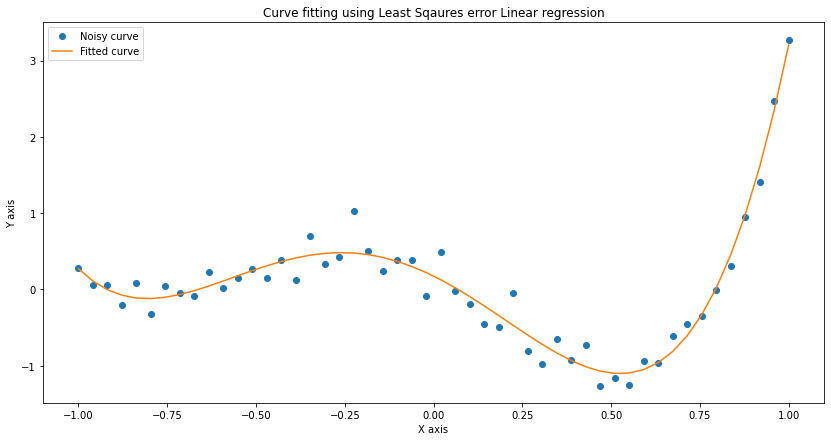

In [16]:
fig, ax2 = plt.subplots(figsize=figs)
plt.plot(x, y, 'o')
plt.plot(x, y_hat)
plt.title("Curve fitting using Least Sqaures error Linear regression")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.legend(["Noisy curve", "Fitted curve"])

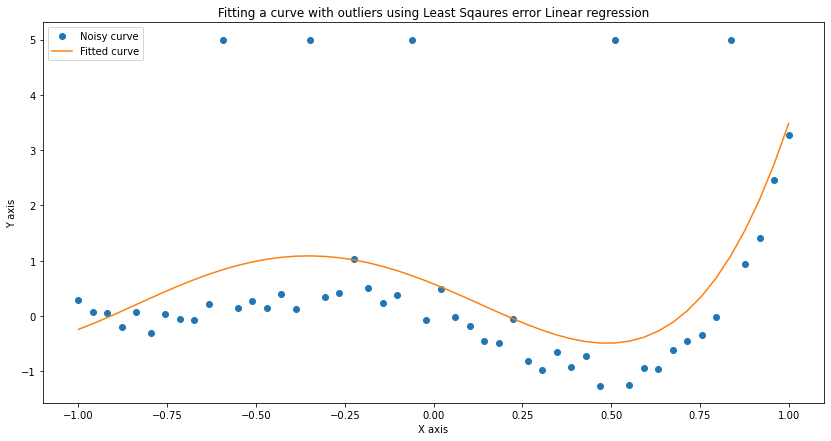

In [17]:
idx = [10,16,23,37,45] 
y[idx] = 5
X = np.column_stack((eval_legendre(0,x), eval_legendre(1,x), eval_legendre(2,x), eval_legendre(3,x), eval_legendre(4,x)))
b_hat= np.linalg.lstsq(X, y, rcond=None)[0]
y_hat = b_hat[0] + b_hat[1]*L1 + b_hat[2]*L2 + b_hat[3]*L3 + b_hat[4]*L4

fig, ax3 = plt.subplots(figsize=figs)
plt.plot(x, y, 'o')
plt.plot(x, y_hat)
plt.title("Fitting a curve with outliers using Least Sqaures error Linear regression")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.legend(["Noisy curve", "Fitted curve"])

#### Observation: The existence of outliers has severly impacted the performance of Least Square regression. The fitted curve has experienced a positive offset, and no longer is representative of the data

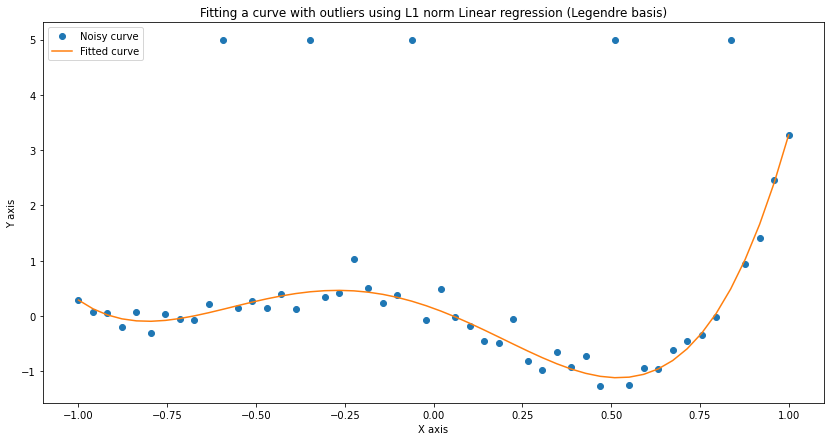

In [18]:
A = np.vstack((np.hstack((X, -np.eye(N))), np.hstack((-X, -np.eye(N)))))
b = np.hstack((y,-y))
c = np.hstack((np.zeros(5), np.ones(N)))
res = linprog(c, A, b, bounds=(None,None), method="revised simplex")
beta = res.x
t = np.linspace(-1,1,N)
y_hat = beta[0] + beta[1]*L1 + beta[2]*L2 + beta[3]*L3 + beta[4]*L4

fig, ax4 = plt.subplots(figsize=figs)
plt.plot(x,y,'o')
plt.plot(t,y_hat)
plt.title("Fitting a curve with outliers using L1 norm Linear regression (Legendre basis)")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.legend(["Noisy curve", "Fitted curve"])


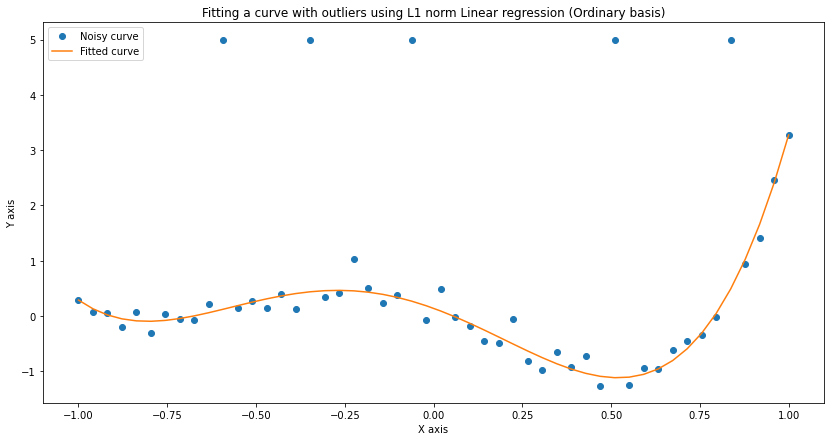

In [19]:
X = np.column_stack((np.ones(x.shape), x, x**2, x**3, x**4))
A = np.vstack((np.hstack((X, -np.eye(N))), np.hstack((-X, -np.eye(N)))))
b = np.hstack((y,-y))
c = np.hstack((np.zeros(5), np.ones(N)))
res = linprog(c, A, b, bounds=(None,None), method="revised simplex")
beta = res.x
t = np.linspace(-1,1,N)
y_hat = beta[0] + beta[1]*x + beta[2]*(x**2) + beta[3]*(x**3) + beta[4]*(x**4)

fig, ax4 = plt.subplots(figsize=figs)
plt.plot(x,y,'o')
plt.plot(t,y_hat)
plt.title("Fitting a curve with outliers using L1 norm Linear regression (Ordinary basis)")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.legend(["Noisy curve", "Fitted curve"])


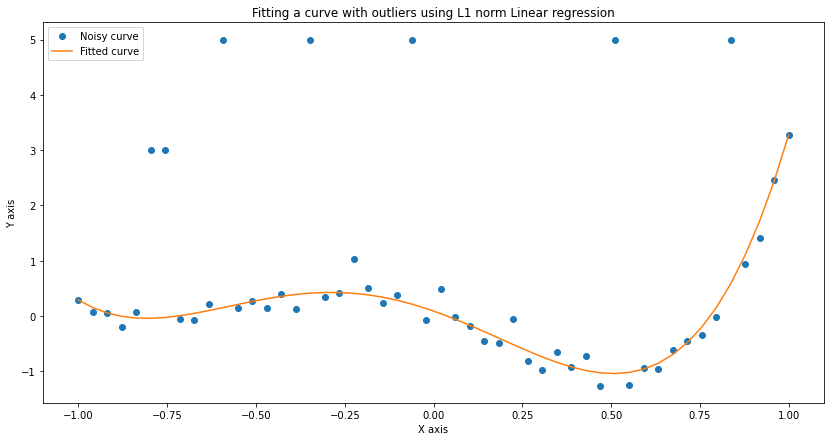

In [21]:
idx = [10,16,23,37,45] # these are the locations of the old outliers
y[idx] = 5
y[idx] = 5
idx = [5, 6] # these are the locations of the new outliers
idx = [5, 6] # these are the locations of the new outliers
y[idx] = 3 # they take on a value of 3
y[idx] = 3 # they take on a value of 3

X = np.column_stack((eval_legendre(0,x), eval_legendre(1,x), eval_legendre(2,x), eval_legendre(3,x), eval_legendre(4,x)))
A = np.vstack((np.hstack((X, -np.eye(N))), np.hstack((-X, -np.eye(N)))))
b = np.hstack((y,-y))
c = np.hstack((np.zeros(5), np.ones(N)))
res = linprog(c, A, b, bounds=(None,None), method="revised simplex")
beta = res.x
t = np.linspace(-1,1,N)
y_hat = beta[0] + beta[1]*L1 + beta[2]*L2 + beta[3]*L3 + beta[4]*L4

fig, ax4 = plt.subplots(figsize=figs)
plt.plot(x,y,'o')
plt.plot(t,y_hat)
plt.title("Fitting a curve with outliers using L1 norm Linear regression")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.legend(["Noisy curve", "Fitted curve"])